In [1]:
import pandas as pd
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import col
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('words')
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.corpus import words as english_words
import string
import matplotlib.pyplot as plt

In [2]:
word_stemmer = PorterStemmer()
stemmer = PorterStemmer()
plt.style.use('ggplot')

## Spark Context

In [3]:
sc = SparkContext("local[*]", "explore")
spark = SparkSession.builder.master('local') \
.config("spark.driver.memory", "15g").getOrCreate()

# Importing the Data

In [4]:
blog = spark.read.csv('/spring2021//project1/blogtext.csv', inferSchema=True, header=True)

hack = spark.read.csv('/spring2021/project1/hacker_news_sample.csv', header=True, inferSchema=True)

In [5]:
blogDF = blog.toDF('id','gender','age','topic','sign','date','text')

hackDF = hack.toDF('title','url','text','dead','by','score',
                   'time','type','id','parent','descendants','ranking','deleted','timestamp')

#### Blog Data

In [6]:
blogDF.show(5)

+-------+------+---+-----------------+--------+------------+--------------------+
|     id|gender|age|            topic|    sign|        date|                text|
+-------+------+---+-----------------+--------+------------+--------------------+
|2059027|  male| 15|          Student|     Leo| 14,May,2004|           Info h...|
|2059027|  male| 15|          Student|     Leo| 13,May,2004|           These ...|
|2059027|  male| 15|          Student|     Leo| 12,May,2004|           In het...|
|2059027|  male| 15|          Student|     Leo| 12,May,2004|           testin...|
|3581210|  male| 33|InvestmentBanking|Aquarius|11,June,2004|             Than...|
+-------+------+---+-----------------+--------+------------+--------------------+
only showing top 5 rows



#### Hacker Data

In [7]:
hackDF.show(5)

+-----+----+--------------------+----+-----------+-----+----------+-------+--------+--------+-----------+-------+-------+-------------------+
|title| url|                text|dead|         by|score|      time|   type|      id|  parent|descendants|ranking|deleted|          timestamp|
+-----+----+--------------------+----+-----------+-----+----------+-------+--------+--------+-----------+-------+-------+-------------------+
| null|null|&gt;<i>which lead...|null|    coldtea| null|1390843873|comment| 7131680| 7127578|       null|   null|   null|2014-01-27 12:31:13|
| null|null|I would like to p...|null|     etanol| null|1319395600|comment| 3146879| 3145330|       null|   null|   null|2011-10-23 14:46:40|
| null|null|                null|null|       null| null|1456640816|comment|11190089|11189361|       null|   null|   True|2016-02-28 01:26:56|
| null|null|<i>Our msbuild im...|null|  Locke1689| null|1407881590|comment| 8170491| 8170071|       null|   null|   null|2014-08-12 18:13:10|
| null

#### Traditional Text

In [8]:
trad1 = open("/spring2021/project1/comparison/Charles Dickens - Cities.txt", 'r')
trad2 = open("/spring2021/project1/comparison/Mary Shelley - Frankenstein.txt", 'r')
trad3 = open("/spring2021/project1/comparison/Nathaniel Hawthorne - Scarlet.txt", 'r')
trad4 = open("/spring2021/project1/comparison/Herman Melville - Moby.txt", 'r')
trad5 = open("/spring2021/project1/comparison/Scott Fitzgerald - Gatsby.txt", 'r')
trad6 = open("/spring2021/project1/comparison/Jane Austen - Pride.txt", 'r')
trad7 = open("/spring2021/project1/comparison/Conan Doyle - Sherlock.txt", 'r')

filelist = [trad1, trad2, trad3, trad4, trad5, trad6, trad7]

In [9]:
def start_of_file(tradfile):
    tradfile.seek(0)
    i = -1
    while True:
        i += 1
        nxt = tradfile.readline()
        if nxt[0:3] == "***":
            tradfile.readline()
            i += 1
            print("The file is at the beginning. Line: " + str(i))
            break

## Word Counts in Traditional Text

In [10]:
totalWords = 0

def word_dict(tradfiles):    
    global totalWords
    wordCnt = {}
    for tradfile in tradfiles:
        start_of_file(tradfile)
        lines = tradfile.readlines()
        for line in lines:
            rmRet = ' '.join(line.split('\n'))
            puncRm = ''.join([c for c in rmRet if c not in string.punctuation + '“”'])
            words = puncRm.split(' ')
            for word in words:
                totalWords += 1
                word = word.lower()
                if word not in list(wordCnt.keys()) and word != '':
                    wordCnt[word] = 1
                elif word != '':
                    wordCnt[word] += 1
    return wordCnt

In [11]:
#This chunk will take a few minutes to execute due to the computational complexity

totalWords = 0
word_counts = word_dict(filelist)

The file is at the beginning. Line: 22
The file is at the beginning. Line: 26
The file is at the beginning. Line: 24
The file is at the beginning. Line: 24
The file is at the beginning. Line: 25
The file is at the beginning. Line: 24
The file is at the beginning. Line: 21


## Sorted Word Frequency in Tradional Text

In [12]:
trad_words_sorted = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

print(f'Total count of words is {totalWords}.')

totalUniqueTrad = len(list(trad_words_sorted.keys()))

print(f'Total count of unique words is {totalUniqueTrad}')

unique_trad = round((totalUniqueTrad/totalWords),5)

print(f'The proportion of unique words by word count is {unique_trad}')

dict(list(trad_words_sorted.items())[0:30])

Total count of words is 985999.
Total count of unique words is 34812
The proportion of unique words by word count is 0.03531


{'the': 45433,
 'and': 25527,
 'of': 24672,
 'to': 20592,
 'a': 17347,
 'in': 14105,
 'i': 13328,
 'that': 10855,
 'it': 9788,
 'was': 9365,
 'his': 8892,
 'he': 8401,
 'with': 7305,
 'you': 6676,
 'as': 6608,
 'had': 5906,
 'her': 5719,
 'for': 5717,
 'but': 5457,
 'is': 5396,
 'not': 5271,
 'my': 5262,
 'at': 5169,
 'be': 4854,
 'on': 4404,
 'have': 4228,
 'this': 4150,
 'him': 4026,
 'by': 3927,
 'all': 3927}

### Most Frequent Words in Traditional Text, (with stopwords)

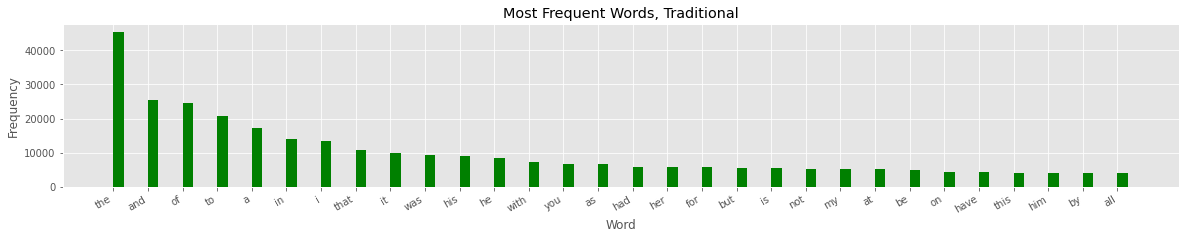

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(20,3))

plt.bar(list(trad_words_sorted.keys())[:30], 
        list(trad_words_sorted.values())[:30], color ='green',
       align='edge', width=0.3)

plt.xticks(rotation=30, ha='right')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Frequent Words, Traditional')

plt.show()

### Removing Stopwords

In [14]:
stopWords = set(stopwords.words('english'))

trad_no_stops = trad_words_sorted

for i in list(trad_words_sorted.keys()):
    if i in stopWords:
        try:
            del trad_no_stops[i]
        except KeyError:
            pass

dict(list(trad_no_stops.items())[0:30])

{'one': 2547,
 'said': 2323,
 'would': 2077,
 'mr': 1945,
 'could': 1750,
 'upon': 1742,
 'man': 1556,
 'little': 1367,
 'like': 1237,
 'time': 1197,
 'must': 1114,
 'may': 1064,
 'old': 1059,
 'see': 1048,
 'much': 1025,
 'know': 981,
 'might': 969,
 'whale': 962,
 'never': 951,
 'two': 936,
 'well': 929,
 'long': 919,
 'yet': 885,
 'good': 873,
 'us': 865,
 'made': 834,
 'though': 824,
 'every': 806,
 'first': 802,
 'great': 802}

### Most Frequent Words in Traditional Text, (Removing stopwords)

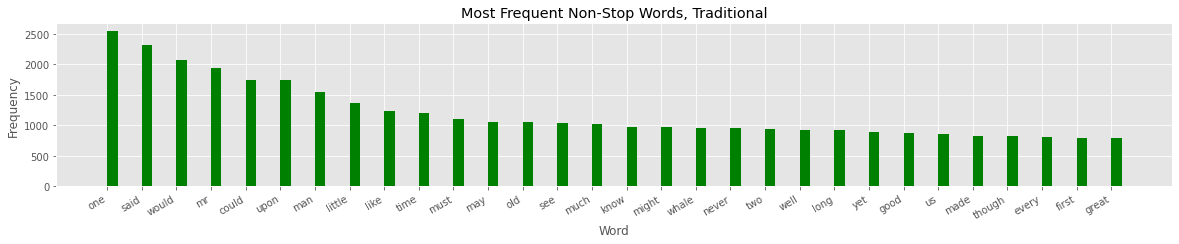

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(20,3))

plt.bar(list(trad_no_stops.keys())[:30], 
        list(trad_no_stops.values())[:30], color ='green',
       align='edge', width=0.3)

plt.xticks(rotation=30, ha='right')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Frequent Non-Stop Words, Traditional')

plt.show()

## Most Frequent Words Blog Text

In [16]:
blog_text = blogDF.rdd.map(lambda x: (x.text))

from nltk.tokenize import TweetTokenizer

In [17]:
words = blog_text.flatMap(lambda s: TweetTokenizer().tokenize(s.lower()))

words = words.filter(lambda w: [x for x in w if x not in string.punctuation])

blog_count = words.map(lambda word: (word, 1))

#words.take(5)

stopped = words.filter(lambda w: w not in stopWords)

#stopped.take(5)

In [18]:
blog_total_words = blog_count.count()
blog_total_words

137717020

In [19]:
blog_count_RBK = blog_count.reduceByKey(lambda a, b: (a+b)).sortByKey()

In [20]:
blog_count_RBK = blog_count_RBK.map(lambda x: (x[1], x[0]))

blog_top_30 = blog_count_RBK.sortByKey(False).take(30)

In [21]:
blog_unique_words = blog_count_RBK.count()

In [22]:
unique_blog = round((blog_unique_words/blog_total_words),5)

print(f'Total count of words is {blog_total_words}.')

print(f'Total count of unique words is {blog_unique_words}')

print(f'The proportion of unique words by word count is {unique_blog}')

Total count of words is 137717020.
Total count of unique words is 1011570
The proportion of unique words by word count is 0.00735


In [23]:
y = []
x = []

for i in blog_top_30:
    y.append(int(i[0])/1000000)
    x.append(i[1])

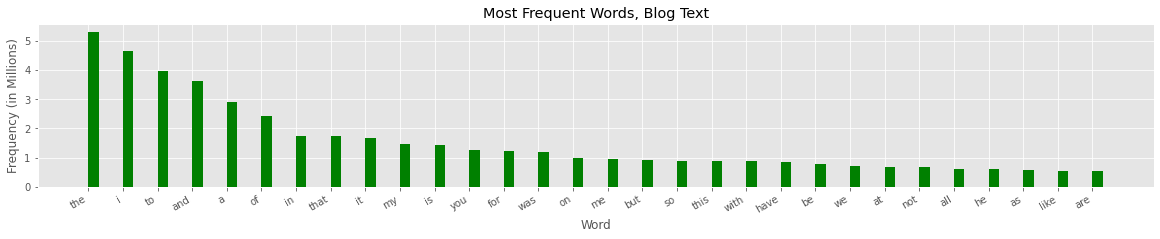

In [24]:
plt.style.use('ggplot')
plt.figure(figsize=(20,3))

plt.bar(x, y, color ='green',
       align='edge', width=0.3)

plt.xticks(rotation=30, ha='right')
plt.xlabel('Word')
plt.ylabel('Frequency (in Millions)')
plt.title('Most Frequent Words, Blog Text')

plt.show()

### Removing Stop Words

In [25]:
blog_count = stopped.map(lambda word: (word, 1))

blog_count_RBK = blog_count.reduceByKey(lambda a, b: (a+b)).sortByKey()

blog_count_RBK = blog_count_RBK.map(lambda x: (x[1], x[0]))


blog_no_stops_30 = blog_count_RBK.sortByKey(False).take(30)

y = []
x = []

for i in blog_no_stops_30:
    y.append(int(i[0])/1000000)
    x.append(i[1])

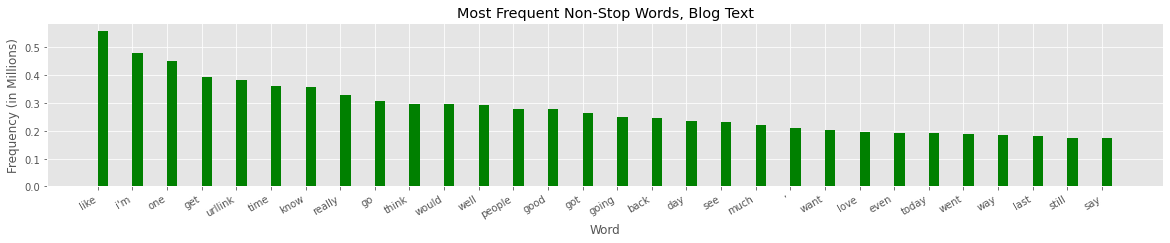

In [26]:
plt.style.use('ggplot')
plt.figure(figsize=(20,3))

plt.bar(x, y, color ='green',
       align='edge', width=0.3)

plt.xticks(rotation=30, ha='right')
plt.xlabel('Word')
plt.ylabel('Frequency (in Millions)')
plt.title('Most Frequent Non-Stop Words, Blog Text')

plt.show()

## Unique Words in Writing

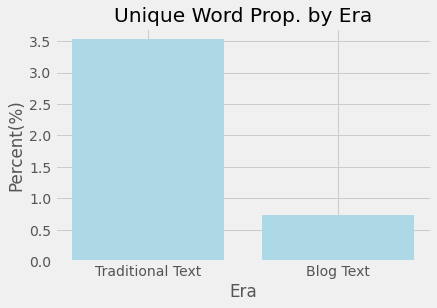

In [27]:
plt.style.use('fivethirtyeight')
plt.bar(['Traditional Text', 'Blog Text'], [unique_trad*100, unique_blog*100], color='lightblue')
plt.xlabel('Era')
plt.ylabel('Percent(%)')
plt.title('Unique Word Prop. by Era')
plt.show()

#### There are 5 times as many distinct words in tradtional writing as there are in modern blog posts!

-
-


## Most Frequent Symbols and Punctuation Characters

### Traditional Writing Symbols

In [28]:
totalChars = 0

def symbol_dict(tradfiles):    
    global totalChars
    symbolCnt = {}
    for tradfile in tradfiles:
        start_of_file(tradfile)
        lines = tradfile.readlines()
        for line in lines:
            rmRet = ' '.join(line.split('\n'))
            totalChars += len("".join(rmRet.split()))
            puncRm = ''.join([c for c in rmRet if c not in string.ascii_letters + string.digits])
            words = puncRm.split(' ')
            for word in words:
                for i in word:
                    if i not in list(symbolCnt.keys()) and i != '':
                        symbolCnt[i] = 1
                    elif i != '':
                        symbolCnt[i] += 1
    return symbolCnt

In [29]:
totalChars = 0
symbol_trad = symbol_dict(filelist)

The file is at the beginning. Line: 22
The file is at the beginning. Line: 26
The file is at the beginning. Line: 24
The file is at the beginning. Line: 24
The file is at the beginning. Line: 25
The file is at the beginning. Line: 24
The file is at the beginning. Line: 21


In [30]:
symbol_trad = dict(sorted(symbol_trad.items(), key=lambda item: item[1], reverse=True))

print(f'There are {totalChars} characters in traditional writing.\n')

trad_symbol_count = sum(symbol_trad.values())

print(f'There are {trad_symbol_count} symbols and punctuation in traditional writing.\n')

trad_char_prop = round((trad_symbol_count/totalChars),5)

print(f'The proportion of symbols and punctuation per character is {trad_char_prop}')

symbol_trad

There are 3711324 characters in traditional writing.

There are 171158 symbols and punctuation in traditional writing.

The proportion of symbols and punctuation per character is 0.04612


{',': 67250,
 '.': 37301,
 '“': 11715,
 '”': 10770,
 '-': 9365,
 ';': 8756,
 '’': 7766,
 '!': 4673,
 '?': 3975,
 '—': 3670,
 '_': 2124,
 ':': 875,
 '‘': 782,
 '(': 525,
 ')': 525,
 '*': 278,
 '"': 154,
 'é': 88,
 '[': 86,
 ']': 86,
 '/': 81,
 '…': 54,
 "'": 52,
 'æ': 51,
 '£': 41,
 '$': 18,
 'ê': 15,
 '&': 13,
 '\u200a': 12,
 '\t': 10,
 'è': 9,
 '%': 7,
 'œ': 7,
 'à': 5,
 '@': 3,
 'ô': 3,
 'â': 2,
 'ח': 1,
 'ו': 1,
 'ϰ': 1,
 'η': 1,
 'τ': 1,
 'ο': 1,
 'ς': 1,
 'Œ': 1,
 'ç': 1,
 '#': 1,
 '½': 1}

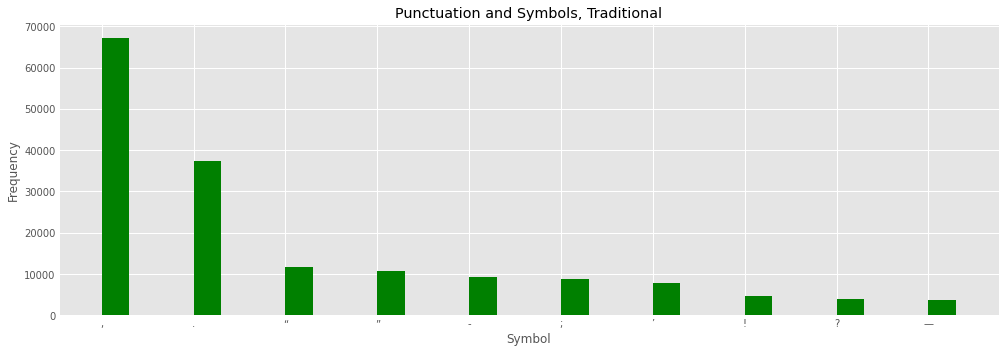

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(list(symbol_trad.keys())[:10], 
        list(symbol_trad.values())[:10], color ='green',
       align='edge', width=0.3)

plt.xlabel('Symbol')
plt.ylabel('Frequency')
plt.title('Punctuation and Symbols, Traditional')

plt.show()

#### Removing the Punctuation

In [32]:
symbol_puncRm_trad = symbol_trad

for i in list(symbol_trad.keys()):
    if i in string.punctuation:
        try:
            del symbol_puncRm_trad[i]
        except KeyError:
            pass

symbol_puncRm_trad

{'“': 11715,
 '”': 10770,
 '’': 7766,
 '—': 3670,
 '‘': 782,
 'é': 88,
 '…': 54,
 'æ': 51,
 '£': 41,
 'ê': 15,
 '\u200a': 12,
 '\t': 10,
 'è': 9,
 'œ': 7,
 'à': 5,
 'ô': 3,
 'â': 2,
 'ח': 1,
 'ו': 1,
 'ϰ': 1,
 'η': 1,
 'τ': 1,
 'ο': 1,
 'ς': 1,
 'Œ': 1,
 'ç': 1,
 '½': 1}

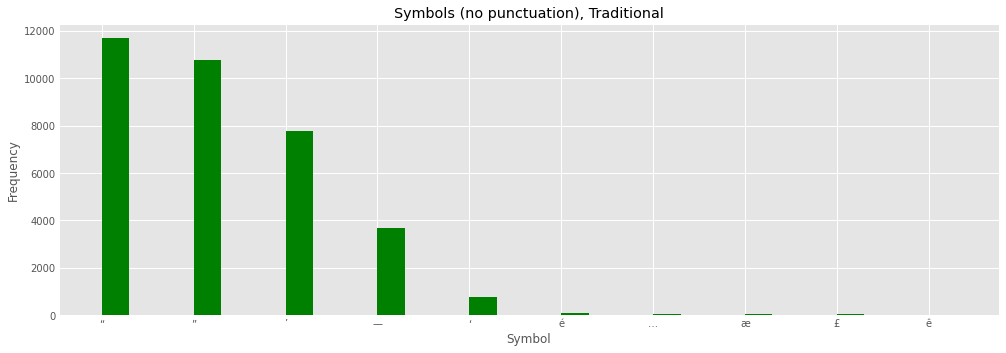

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(list(symbol_puncRm_trad.keys())[:10], 
        list(symbol_puncRm_trad.values())[:10], color ='green',
       align='edge', width=0.3)

plt.xlabel('Symbol')
plt.ylabel('Frequency')
plt.title('Symbols (no punctuation), Traditional')

plt.show()

### Blog Symbols and Punctuation

In [34]:
blog_text = blogDF.rdd.map(lambda x: (x.text))

In [35]:
blog_chars = blog_text.flatMap(lambda s: [i for i in s if i not in ' '])

total_blog_chars = blog_chars.count()

symbols = blog_text.flatMap(lambda s: [i for i in s if ((i not in string.ascii_letters) \
                                                        and (i not in ' ') and (i not in string.digits))])

In [36]:
blog_count = symbols.map(lambda sym: (sym, 1))
blog_count_RBK = blog_count.reduceByKey(lambda a, b: (a+b)).sortByKey()
blog_count_RBK = blog_count_RBK.map(lambda x: (x[1], x[0]))
blog_top_20 = blog_count_RBK.sortByKey(False).take(20)

In [37]:
print(f'There are {total_blog_chars} total characters in blog text.\n')

blog_top_20

There are 605529293 total characters in blog text.



[(13065716, '.'),
 (6090708, ','),
 (4617581, "'"),
 (1619100, '-'),
 (1432693, '!'),
 (913185, ':'),
 (827233, '?'),
 (750789, ')'),
 (659952, '('),
 (648315, ';'),
 (577244, '&'),
 (293804, '*'),
 (262512, '/'),
 (207105, '’'),
 (126543, '_'),
 (82138, '='),
 (76578, '~'),
 (65396, ']'),
 (64278, '['),
 (57882, '$')]

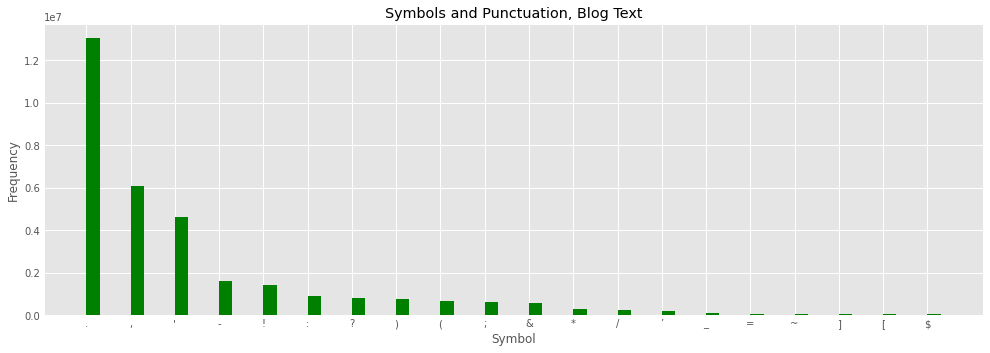

In [38]:
x = [i[1] for i in blog_top_20]
y = [i[0] for i in blog_top_20]

plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(x, 
        y, color ='green',
       align='edge', width=0.3)

plt.xlabel('Symbol')
plt.ylabel('Frequency')
plt.title('Symbols and Punctuation, Blog Text')

plt.show()

### Blog Symbols (punctuation removed)

In [39]:
blog_text = blogDF.rdd.map(lambda x: (x.text))

blog_chars = blog_text.flatMap(lambda s: [i for i in s if i not in ' '])

total_blog_chars = blog_chars.count()

symbols = blog_text.flatMap(lambda s: [i for i in s if \
                                       ((i not in string.ascii_letters) and \
                                        (i not in ' ') and (i not in string.digits) and \
                                        (i not in string.punctuation))])

blog_count = symbols.map(lambda sym: (sym, 1))
blog_count_RBK = blog_count.reduceByKey(lambda a, b: (a+b)).sortByKey()
blog_count_RBK = blog_count_RBK.map(lambda x: (x[1], x[0]))
blog_top_20 = blog_count_RBK.sortByKey(False).take(20)

blog_top_20

[(207105, '’'),
 (52791, '”'),
 (52268, '“'),
 (50255, '…'),
 (42781, '\x00'),
 (15820, '–'),
 (11935, '\xa0'),
 (8959, '—'),
 (8607, '‘'),
 (7682, '的'),
 (6888, '�'),
 (6487, 'ا'),
 (5999, '，'),
 (5746, 'é'),
 (5472, '我'),
 (4500, 'ä'),
 (3970, '·'),
 (3858, '。'),
 (3792, 'ی'),
 (3602, 'ن')]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 

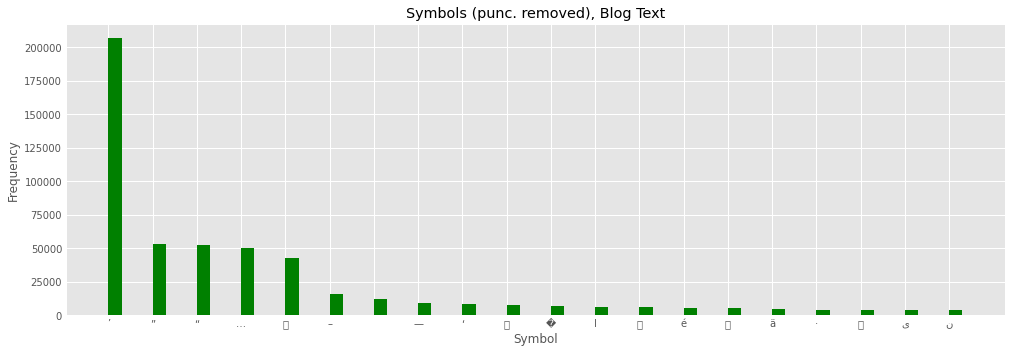

In [40]:
x = [i[1] for i in blog_top_20]
y = [i[0] for i in blog_top_20]

plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(x, 
        y, color ='green',
       align='edge', width=0.3)

plt.xlabel('Symbol')
plt.ylabel('Frequency')
plt.title('Symbols (punc. removed), Blog Text')

plt.show()

## Symbols Per Character Traditional vs Blog Text

#### Traditional

In [41]:
symbol_count_trad = 0

for i in symbol_puncRm_trad.values():
    symbol_count_trad += i
    
trad_sym_prop = round((symbol_count_trad/totalChars),5)

trad_sym_prop

0.00943

#### Blog

In [42]:
blog_symbols_count = blog_count.count()

blog_sym_prop = round((blog_symbols_count/total_blog_chars),5)

#### Results

In [43]:
print(f'The proportion of non-puntuation symbols per character for traditional text is {trad_sym_prop}\n')

print(f'The proportion of non-puntuation symbols per character for blog text is {blog_sym_prop}\n')

The proportion of non-puntuation symbols per character for traditional text is 0.00943

The proportion of non-puntuation symbols per character for blog text is 0.00143



### Plotting Results

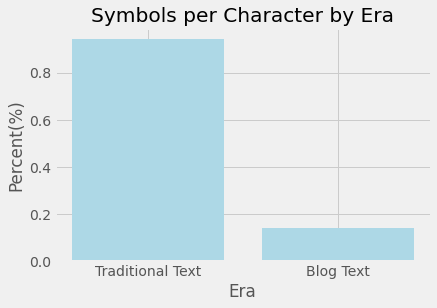

In [44]:
plt.style.use('fivethirtyeight')
plt.bar(['Traditional Text', 'Blog Text'], [trad_sym_prop*100, blog_sym_prop*100], color='lightblue')
plt.xlabel('Era')
plt.ylabel('Percent(%)')
plt.title('Symbols per Character by Era')
plt.show()

In [45]:
trad_sym_prop/blog_sym_prop

6.594405594405593

#### There are about 6.6 times as many non-punctuation symbols is traditional writing than in blog posts!